In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('dataset/data.csv', index_col=0)

변환

In [8]:
# 통화 변환-> 실수화
def exchange(value):
    out = value.replace('€', '')
    if 'M' in out:
        out = float(out.replace('M',''))*1000000
    elif 'K' in out:
        out = float(out.replace('K',''))*1000
    return float(out)

In [9]:
df.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiv

In [13]:
df[['Name','Overall', 'Position', 'RF','ST','LW','RCM','Composure','GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes']]

,Name,Overall,Position,RF,ST,LW,RCM,Composure,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,L. Messi,94,RF,93+2,88+2,92+2,84+2,96.0,6.0,11.0,15.0,14.0,8.0
1,Cristiano Ronaldo,94,ST,90+3,91+3,89+3,81+3,95.0,7.0,11.0,15.0,14.0,11.0
2,Neymar Jr,92,LW,89+3,84+3,89+3,81+3,94.0,9.0,9.0,15.0,15.0,11.0
3,De Gea,91,GK,NaN,NaN,NaN,NaN,68.0,90.0,85.0,87.0,88.0,94.0
4,K. De Bruyne,91,RCM,87+3,82+3,87+3,87+3,88.0,15.0,13.0,5.0,10.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,J. Lundstram,47,CM,44+2,42+2,44+2,45+2,45.0,10.0,13.0,7.0,8.0,9.0
18203,N. Christoffersson,47,ST,42+2,45+2,39+2,35+2,42.0,10.0,9.0,9.0,5.0,12.0
18204,B. Worman,47,ST,46+2,45+2,45+2,38+2,41.0,6.0,5.0,10.0,6.0,13.0
18205,D. Walker-Rice,47,RW,46+2,47+2,47+2,39+2,46.0,14.0,6.0,14.0,8.0,9.0


In [8]:
df.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiv

In [4]:
df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [13]:
# df.Value = df.Value.apply(lambda x: exchange(x))
# df.Wage = df.Wage.apply(lambda x: exchange(x))
df['Release Clause'] = df['Release Clause'].astype('str')
df['Release Clause'] = df['Release Clause'].apply(lambda x: exchange(x))

In [14]:
wr = df['Work Rate'].str.split('/', expand=True)
df['Attack_WR']= wr[0]
df['Attack_WR'].replace({'High':2, 'Medium':1,'Low':0},inplace= True)
df['Defence_WR']=wr[1]
df['Defence_WR'].replace({' High':2, ' Medium':1,' Low':0},inplace= True)

## 결측치가 많은 칼럼이나 불필요한 칼럼 삭제

In [15]:
# nan 행 삭제
nan_data=df.iloc[13236:13284,:]
nan_data.index
df.drop(nan_data.index,inplace = True)

In [ ]:
Value=0인 선수 11명도 삭제함(6.회귀 평가에 결과 있음)

In [ ]:
df.query('Value==0')[['Name', 'Overall', 'Age', 'Joined', 'Contract Valid Until','Wage', 'Value','Loaned From','Position_Class']]

In [16]:
# club nan 행 탐색
df.Club.fillna('non_club', inplace = True)
df.query("Club=='non_club'")[['Club','Wage','Age','Name', 'Value','Position', 'Jersey Number','International Reputation','Release Clause','Joined',
                              'Loaned From','Contract Valid Until','Release Clause']].head()
# 삭제해도 무방해보임

,Club,Wage,Age,Name,Value,Position,Jersey Number,International Reputation,Release Clause,Joined,Loaned From,Contract Valid Until,Release Clause
452,non_club,0.0,24,L. Paredes,0.0,CM,5.0,2.0,NaN,NaN,NaN,NaN,NaN
538,non_club,0.0,33,A. Granqvist,0.0,LCB,4.0,2.0,NaN,NaN,NaN,NaN,NaN
568,non_club,0.0,26,A. Lunev,0.0,GK,12.0,1.0,NaN,NaN,NaN,NaN,NaN
677,non_club,0.0,29,I. Smolnikov,0.0,RB,2.0,2.0,NaN,NaN,NaN,NaN,NaN
874,non_club,0.0,29,A. Dzyuba,0.0,ST,22.0,2.0,NaN,NaN,NaN,NaN,NaN


In [17]:
# 클럽 결측치 삭제 -> 클럽이 없으면 wage도 0
non_club_s=df[df.Club =='non_club'].index
df.drop(non_club_s,inplace = True)        

# 칼럼 삭제 ( 나중에 하기)

In [38]:
df.drop(['Nationality','Work Rate'], axis=1, inplace = True)
# 'Contract Valid Until'

In [39]:
df.drop(['Photo', 'Flag','Club Logo'], axis=1, inplace=True)

In [40]:
df.drop(['ID','Club'], axis=1, inplace=True)# Loaned From

In [34]:
# df.drop(['Joined','Contract Valid Until','Release Clause', 'Loaned From'], axis=1, inplace=True) # 이건 나중에 

In [41]:
# 쓸모 없거나, 결측치 많은 것, 파생변수 만든 칼럼 삭제
df.drop(['Body Type', 'Real Face','Position','Jersey Number',
       'Height', 'Weight'],axis=1,inplace=True)

In [48]:
df.drop(['Attack_WR', 'Defence_WR'],axis=1, inplace=True)

In [50]:
df.drop(['Preferred Foot','Weak Foot','GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes'],axis=1, inplace=True)

In [53]:
# 능력치 관련 칼럼
df.drop(['Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle'], axis=1, inplace=True)
#, 'Skill Moves', 'Composure'

In [58]:
df.drop(['Composure_C','Release Clause'], axis=1, inplace=True) #넣어보니 쓸모가 없어서 

<AxesSubplot:xlabel='Skill Moves', ylabel='count'>

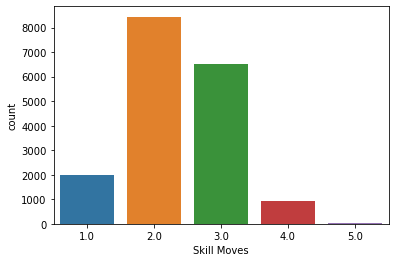

In [38]:
sns.countplot(df['Skill Moves'])

<AxesSubplot:xlabel='Composure', ylabel='Density'>

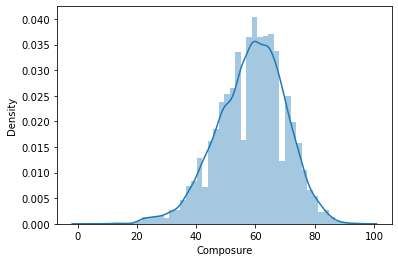

In [40]:
sns.distplot(df.Composure)

<AxesSubplot:xlabel='International Reputation', ylabel='count'>

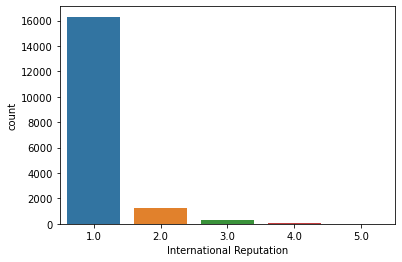

In [39]:
sns.countplot(df['International Reputation'])

Joined, Contract Valid Unitil, Release Clause

In [126]:
df['Joined'] = pd.to_datetime(df['Joined'])

In [127]:
df['Contract Valid Until'] = pd.to_datetime(df['Contract Valid Until'])

In [128]:
df['Release Clause'].fillna(0,inplace=True)

In [131]:
df.head(30)

,Name,Age,Nation_C,Club_V,Club_N,Overall,Potential,Position_Class,Value,Wage,...,Joined,Loaned From,Contract Valid Until,Release Clause,Attack_WR,Defence_WR,Age_C,Over_C,Composure_C,Special_C
0,L. Messi,31,0,3,16,94,94,3,110500000.0,565000.0,...,2004-07-01,0,2021-01-01,226500000.0,1.0,1.0,6,18,3.0,1
1,Cristiano Ronaldo,33,2,3,15,94,94,3,77000000.0,405000.0,...,2018-07-10,0,2022-01-01,127100000.0,2.0,0.0,7,18,3.0,1
2,Neymar Jr,26,0,3,14,92,93,3,118500000.0,290000.0,...,2017-08-03,0,2022-01-01,228100000.0,2.0,1.0,4,17,3.0,1
3,De Gea,27,2,3,13,91,93,0,72000000.0,260000.0,...,2011-07-01,0,2020-01-01,138600000.0,1.0,1.0,5,16,3.0,0
4,K. De Bruyne,27,2,3,13,91,92,2,102000000.0,355000.0,...,2015-08-30,0,2023-01-01,196400000.0,2.0,2.0,5,16,3.0,1
5,E. Hazard,27,2,3,13,91,91,3,93000000.0,340000.0,...,2012-07-01,0,2020-01-01,172100000.0,2.0,1.0,5,16,3.0,1
6,L. Modrić,32,2,3,16,91,91,2,67000000.0,420000.0,...,2012-08-01,0,2020-01-01,137400000.0,2.0,2.0,7,16,3.0,1
7,L. Suárez,31,0,3,16,91,91,3,80000000.0,455000.0,...,2014-07-11,0,2021-01-01,164000000.0,2.0,1.0,6,16,3.0,1
8,Sergio Ramos,32,2,3,16,91,91,1,51000000.0,380000.0,...,2005-08-01,0,2020-01-01,104600000.0,2.0,1.0,7,16,3.0,1
9,J. Oblak,25,2,3,16,90,93,0,68000000.0,94000.0,...,2014-07-16,0,2021-01-01,144500000.0,1.0,1.0,4,15,3.0,0


In [129]:
df['Loaned From'].fillna(0,inplace=True)
df[df['Loaned From']==0][['Name', 'Overall','Wage', 'Value','Release Clause','Joined','Loaned From','Position_Class', 'Contract Valid Until']]

,Name,Overall,Wage,Value,Release Clause,Joined,Loaned From,Position_Class,Contract Valid Until
0,L. Messi,94,565000.0,110500000.0,226500000.0,2004-07-01,0,3,2021-01-01
1,Cristiano Ronaldo,94,405000.0,77000000.0,127100000.0,2018-07-10,0,3,2022-01-01
2,Neymar Jr,92,290000.0,118500000.0,228100000.0,2017-08-03,0,3,2022-01-01
3,De Gea,91,260000.0,72000000.0,138600000.0,2011-07-01,0,0,2020-01-01
4,K. De Bruyne,91,355000.0,102000000.0,196400000.0,2015-08-30,0,2,2023-01-01
...,...,...,...,...,...,...,...,...,...
18202,J. Lundstram,47,1000.0,60000.0,143000.0,2017-05-03,0,2,2019-01-01
18203,N. Christoffersson,47,1000.0,60000.0,113000.0,2018-03-19,0,3,2020-01-01
18204,B. Worman,47,1000.0,60000.0,165000.0,2017-07-01,0,3,2021-01-01
18205,D. Walker-Rice,47,1000.0,60000.0,143000.0,2018-04-24,0,3,2019-01-01


In [86]:
df8=df[df["Release Clause"] ==0][['Name', 'Overall','Wage', 'Value','Release Clause','Joined','Loaned From', 'Contract Valid Until']]
df8.sort_values(by='Contract Valid Until', ascending = False, inplace = True)
df8.head(30)
# df8['Contract Valid Until'].unique()

,Name,Overall,Wage,Value,Release Clause,Joined,Loaned From,Contract Valid Until
18183,K. Pilkington,48,1000.0,0.0,0.0,2018-08-17,NaN,2023-01-01
12453,W. Díaz,63,1000.0,0.0,0.0,2016-01-10,NaN,2023-01-01
14129,Y. Nakazawa,61,1000.0,0.0,0.0,2002-01-01,NaN,2022-01-01
17752,S. Phillips,52,1000.0,0.0,0.0,2017-08-01,NaN,2022-01-01
3550,S. Nakamura,72,4000.0,0.0,0.0,2017-01-10,NaN,2021-01-01
17672,R. Kawai,53,1000.0,0.0,0.0,2011-01-01,NaN,2021-01-01
1021,A. Schürrle,77,47000.0,9500000.0,0.0,NaT,Borussia Dortmund,2020-06-30
1126,F. Kostić,77,16000.0,10500000.0,0.0,NaT,Hamburger SV,2020-06-30
6059,D. Arzani,69,20000.0,2300000.0,0.0,NaT,Manchester City,2020-06-30
1603,Palhinha,75,10000.0,8000000.0,0.0,NaT,Sporting CP,2020-06-30


In [48]:
df8.isnull().sum()

Name                       0
Overall                    0
Wage                       0
Value                      0
Release Clause             0
Joined                  1264
Loaned From               11
Contract Valid Until       0
dtype: int64

In [133]:
df9=df[['Name', 'Overall','Wage', 'Value','Release Clause','Joined', 'Contract Valid Until']]
df9.sort_values(by='Overall', ascending=False, inplace=True)
df9.head()

,Name,Overall,Wage,Value,Release Clause,Joined,Contract Valid Until
0,L. Messi,94,565000.0,110500000.0,226500000.0,2004-07-01,2021-01-01
1,Cristiano Ronaldo,94,405000.0,77000000.0,127100000.0,2018-07-10,2022-01-01
2,Neymar Jr,92,290000.0,118500000.0,228100000.0,2017-08-03,2022-01-01
3,De Gea,91,260000.0,72000000.0,138600000.0,2011-07-01,2020-01-01
4,K. De Bruyne,91,355000.0,102000000.0,196400000.0,2015-08-30,2023-01-01


In [65]:
W_V_R=df[['Name','Wage','Value', 'Release Clause']]
W_V_R.to_csv('M_V_R.csv')

## 파생변수 , 실수화

In [18]:
# 파생변수 1 Position_Class
df.insert(9,'Position_Class',
            df.apply(lambda x: 
            'Forward' if x['Position'] in ['LS','ST','RS','LW','LF','CF','RF','RW']
            else 'Midfielder' if x['Position'] in ['LAM','CAM','RAM','LM','LCM','CM','RCM','RM']
            else 'Defender' if x['Position'] in  ['LWB','LDM','CDM','RDM','RWB','LB','LCB','CB','RCB','RB']
            else 'GoalKeeper', axis =1))
df.drop(['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB'], axis=1, inplace=True)

In [19]:
# Position 실수화
df['Position_Class'].replace({'Forward':3, 'Midfielder':2, 'Defender':1, 'GoalKeeper':0}, inplace = True) # 숫자를 바꾸면 상관관계의 부호가 달라진다???

In [20]:
# Nation 오타처리
df.Nationality.replace('Bosnia Herzegovina', 'Bosnia', inplace = True)
df.Nationality.replace('Central African Rep.','Central African Rep', inplace = True )

In [21]:
# 파생변수 2 Nation_C
df.insert(6,'Nation_C',
            df.apply(lambda x: 
            'America' if x['Nationality'] in ['Mexico', 'Venezuela','Honduras','Canada','Ecuador','Paraguay','Argentina',
            'Uruguay','Peru','Chile','Colombia','Brazil','Bolivia','Costa Rica','Antigua & Barbuda',
            'El Salvador','Grenada','United States','Suriname','Bermuda','Curacao','Guatemala',
            'Cuba','Panama','Dominican Republic','Barbados','Haiti','Nicaragua','Belize','St Lucia','Trinidad & Tobago',
            'St Kitts Nevis','Guyana','Puerto Rico','Guam','Jamaica']
            else 'Africa' if x['Nationality'] in ['Ghana','Gabon','Gambia','Guinea','Guinea Bissau'
             ,'Namibia','Nigeria','South Sudan','South Africa','Niger','Liberia','Rwanda',
             'Libya','Madagascar','Malawi','Mali','Morocco','Mauritius','Mauritania','Mozambique','Benin'
             ,'Botswana','Burkina Faso','Burundi','São Tomé & Príncipe','Senegal','Sudan','Sierra Leone',
             'Algeria','Angola','Eritrea','Ethiopia','Uganda','Egypt','Zambia','Equatorial Guinea',
             'Central African Rep','Zimbabwe','Chad','Cameroon','Cape Verde','Kenya','Comoros','Congo','DR Congo',
              'Tanzania','Togo','Tunisia','Ivory Coast']
            else 'Europe' if x['Nationality'] in  ['Portugal','Spain','Belgium','Croatia','Slovenia','Poland','Germany',
           'France','England','Italy','Denmark','Wales','Slovakia','Netherlands','Bosnia','Herzegovina','Serbia','Austria',
           'Greece','Sweden','Finland','Montenegro','Armenia','Switzerland','Norway','Czech Republic','Scotland','Russia',
           'Ukraine','Iceland','Albania','Turkey','Israel','Hungary','Republic of Ireland','Romania','Estonia','FYR Macedonia',
           'Bulgaria','Kosovo','Georgia','Belarus','Northern Ireland','Cyprus','Lithuania','Luxembourg',
           'Liechtenstein','Latvia','Kazakhstan','Montserrat','Azerbaijan','Faroe Islands','Andorra','Malta','Moldova']
            else 'Asia' if x['Nationality'] in  ['Korea Republic','Japan','Iran','United Arab Emirates',
            'China PR','Uzbekistan','Saudi Arabia','Philippines' ,'Oman','Iraq',
            'Korea DPR','Kuwait','Thailand','Syria',
            'India','Lebanon','Palestine','Jordan',
            'Qatar','Afghanistan', 'Hong Kong','Indonesia','Australia']
            else 'Oceania', axis =1))

In [22]:
# Nation 실수화
df.Nation_C.replace({'America':0, 'Africa':1,'Europe':2,'Asia':3,'Oceania':4},inplace= True) 

In [23]:
# Preferred Foot 실수화
df['Preferred Foot'].replace({'Right':0, 'Left':1},inplace= True)

In [24]:
# Age_C
def Age_2(x):
    if x <20 : return 1
    elif (20<= x <=22): return 2
    elif (23<= x <=24): return 3
    elif (25<= x <= 26): return 4
    elif (27<= x <= 29): return 5
    elif (30<= x <=31): return 6
    elif (32<= x <=33): return 7
    elif (34 ==x): return 8
    elif (35 <= x <= 38): return 9
    elif (39 ==x): return 10
    elif (40 <= x <= 45): return 11
df['Age_C'] = df.Age.apply(Age_2) 

In [25]:
# Over_C
def Over_2(x):
    if 46<= x <=62 : return 1
    elif 63<= x <=68 : return 2
    elif 69<= x <=72: return 3
    elif 73<= x <=75: return 4
    elif 76<= x <=78: return 5
    elif 79<= x <=80: return 6
    elif 81<= x <=82: return 7
    elif 83==x: return 8
    elif 84==x: return 9
    elif 85==x: return 10
    elif 86==x: return 11
    elif 87==x: return 12
    elif 88==x: return 13
    elif 89==x: return 14
    elif 90==x: return 15
    elif 91==x: return 16
    elif 92==x: return 17
    elif 93<= x <=94 : return 18
df['Over_C']=df.Overall.apply(Over_2)

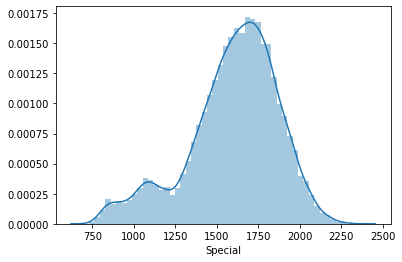

In [18]:
# Special 이상치로 파생변수 보류
sns.distplot(df.Special)

In [110]:
df.Special.describe()

count    17918.000000
mean      1598.111731
std        272.983157
min        731.000000
25%       1457.000000
50%       1636.000000
75%       1787.000000
max       2346.000000
Name: Special, dtype: float64

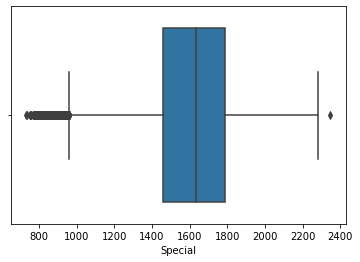

In [20]:
sns.boxplot(df.Special)

In [109]:
iqr = 1787-1457
uw_check = 1787+1.5*iqr
print(uw_check)
st1 = np.sort(df.Special)[::-1]
print('Max 이상치: {}'.format(st1[st1>uw_check]))
print()
lw_check = 1787 -1.5*iqr
print(lw_check)
st2 = np.sort(df.Special)
print('Min 이상치: {}'.format(st2[st2<lw_check])) 

2282.0
Max 이상치: [2346]

1292.0
Min 이상치: [ 731  738  752 ... 1291 1291 1291]


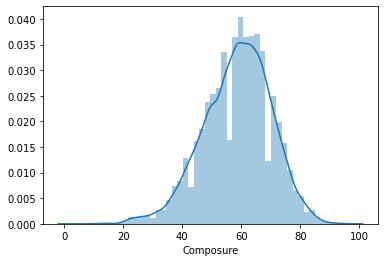

In [22]:
# Composure,사분위수를 기준으로 분할(51, 60, 67,96)
sns.distplot(df.Composure)

In [23]:
df.Composure.describe()

count    17918.000000
mean        58.655263
std         11.420965
min          3.000000
25%         51.000000
50%         60.000000
75%         67.000000
max         96.000000
Name: Composure, dtype: float64

In [26]:
bins = [0,51, 60, 67, 96]
group_names=[0,1,2,3]
df['Composure_C']=pd.cut(df['Composure'], bins, labels=group_names, include_lowest=True)

In [27]:
df.Composure_C.unique()

[3, 2, 0, 1]
Categories (4, int64): [0 < 1 < 2 < 3]

In [28]:
df.Composure_C = df.Composure_C.astype(float)

In [29]:
# 클럽 범주화(나라별)
df.insert(7,'Club_N',
            df.apply(lambda x: 
            'SPAIN' if x['Club'] in ['Athletic Club de Bilbao','Atlético Madrid','CD Leganés','Deportivo Alavés','FC Barcelona',
             'Getafe CF','Girona FC','Levante UD','Real Valladolid CF','Rayo Vallecano','RC Celta','RCD Espanyol',
             'Real Betis','Real Madrid','Real Sociedad','SD Eibar','SD Huesca','Sevilla FC','Valencia CF', 'Villarreal CF']
                     
            else 'ENGLAND' if x['Club'] in ['Arsenal','Leicester City', 'Newcastle United','Chelsea','Crystal Palace','Brighton & Hove Albion',
            'Burnley','Everton','Ipswich Town','Liverpool','Manchester City','Bournemouth', 'Manchester United','Middlesbrough',
            'Watford','Cardiff City', 'Nottingham Forest','Huddersfield Town', 'Southampton', 'Tottenham Hotspur', 'West Ham United', 
                                           'Wolverhampton Wanderers', 'West Ham United', 'Fulham', 'West Bromwich Albion', 'Celtic']
                     
            else 'GERMANY' if x['Club'] in ['FC Bayern München','Borussia Dortmund','RB Leipzig','Bayer 04 Leverkusen','Borussia Mönchengladbach',
                'VfL Wolfsburg','Eintracht Frankfurt','SV Werder Bremen','TSG 1899 Hoffenheim','Fortuna Düsseldorf','Hertha BSC',
                '1. FSV Mainz 05','SC Freiburg','FC Schalke 04','FC Augsburg','VfB Stuttgart','Hannover 96','1. FC Nürnberg','1. FC Köln']
                     
            else 'FRANCE' if x['Club'] in  ['Dijon FCO','Nîmes Olympique','Amiens SC','Angers SCO','FC Girondins de Bordeaux','Stade Malherbe Caen',
              'En Avant de Guingamp','LOSC Lille','Olympique de Marseille','Olympique Lyonnais','AS Monaco','Montpellier HSC',
              'FC Nantes','OGC Nice','Paris Saint-Germain','Stade Rennais FC','Stade de Reims','AS Saint-Étienne',
              'RC Strasbourg Alsace','Toulouse Football Club']
                     
            else 'ITALY' if x['Club'] in ['Sampdoria','Fiorentina','Atalanta','Bologna','Cagliari','Chievo Verona','Empoli','Frosinone',
               'Genoa','Inter','Juventus','Lazio','Milan','Napoli','Parma','Roma','Sassuolo','SPAL','Torino','Udinese']
                     
            else 'FRANCE' if x['Club'] in  ['Dijon FCO','Nîmes Olympique','Amiens SC','Angers SCO','FC Girondins de Bordeaux','Stade Malherbe Caen',
              'En Avant de Guingamp','LOSC Lille','Olympique de Marseille','Olympique Lyonnais','AS Monaco','Montpellier HSC',
              'FC Nantes','OGC Nice','Paris Saint-Germain','Stade Rennais FC','Stade de Reims','AS Saint-Étienne',
              'RC Strasbourg Alsace','Toulouse Football Club']
                     
            else 'BELGIUM' if x['Club'] in ['América FC (Minas Gerais)','Atlético Paranaense','Atlético Mineiro','Bahia',
             'Botafogo','Ceará Sporting Club','Chapecoense','Cruzeiro','Fluminense','Grêmio', 'Internacional','Paraná',
                                            'Santos','Sport Club do Recife','Vitória','Club Brugge KV', 'KRC Genk', 
                                            'RSC Anderlecht', 'KAA Gent']
                     
            else 'CHINA' if x['Club'] in  ['Beijing Sinobo Guoan FC','Beijing Renhe FC','Changchun Yatai FC','Chongqing Dangdai Lifan FC SWM Team',
             'Dalian YiFang FC','Guangzhou Evergrande Taobao FC','Guangzhou R&F; FC','Guizhou Hengfeng FC',
             'Hebei China Fortune FC','Henan Jianye FC','Jiangsu Suning FC','Shandong Luneng TaiShan FC',
             'Shanghai Greenland Shenhua FC','Shanghai SIPG FC','Tianjin Quanjian FC', 'Tianjin TEDA FC']
                     
            else 'JAPAN' if x['Club'] in ['Cerezo Osaka','FC Tokyo','Gamba Osaka','Hokkaido Consadole Sapporo','Júbilo Iwata','Kashima Antlers',
             'Kashiwa Reysol','Kawasaki Frontale','Nagoya Grampus','Sagan Tosu','Shimizu S-Pulse','Sanfrecce Hiroshima',
             'Shonan Bellmare','Urawa Red Diamonds','Vegalta Sendai','Vissel Kobe','V-Varen Nagasaki', 'Yokohama F. Marinos']
                           
            else 'KOREA' if x['Club'] in  ['Daegu FC','FC Seoul','Gangwon FC','Gyeongnam FC','Incheon United FC','Jeju United FC',
             'Jeonbuk Hyundai Motors','Jeonnam Dragons','Pohang Steelers','Sangju Sangmu FC', 'Suwon Samsung Bluewings','Ulsan Hyundai FC']
                    
             else 'NETHERLANDS' if x['Club'] in ['ADO Den Haag','Ajax','AZ Alkmaar','De Graafschap','Excelsior','FC Emmen','FC Groningen',
             'FC Utrecht','Feyenoord','Fortuna Sittard','Heracles Almelo','NAC Breda','PEC Zwolle','PSV','SC Heerenveen','Vitesse','VVV-Venlo',
                                                 'Willem II']
                     
            else 'PORTUGAL' if x['Club'] in ['Os Belenenses','Boavista FC','CD Feirense','CD Tondela','CD Aves','FC Porto','Clube Sport Marítimo',
             'GD Chaves','Moreirense FC','Portimonense SC','Rio Ave FC','Santa Clara','SC Braga','SL Benfica','Sporting CP',
             'Vitória Guimarães','Vitória de Setúbal']
                    
            else 'SAUDI' if x['Club'] in ['Al Ahli','Al Batin','Al Faisaly','Al Fateh','Al Fayha','Al Hazem','Al Hilal','Al Ittihad',
             'Al Nassr','Al Qadisiyah','Al Raed','Al Shabab','Al Wehda','Al Taawoun','Ettifaq FC','Ohod Club']
                     
            else 'ARGENTINA' if x['Club'] in  ['Club Atlético Aldosivi','Argentinos Juniors','Atlético Tucumán','Club Atlético Banfield',
             'Belgrano de Córdoba','Club Atlético Colón','Defensa y Justicia','Estudiantes de La Plata',
             'Gimnasia y Esgrima La Plata','Godoy Cruz','Club Atlético Huracán','Independiente',
             'Club Atlético Lanús',"Newell's Old Boys",'Patronato','Racing Club','River Plate',
             'Rosario Central','San Lorenzo de Almagro','San Martín de San Juan','San Martin de Tucumán',
             'Club Atlético Talleres','Club Atlético Tigre','Unión de Santa Fe','Vélez Sarsfield','Boca Juniors']
                     
            else 'CHILE' if x['Club'] in ['Audax Italiano','CD Antofagasta','CD Huachipato',"CD O'Higgins",'CD Palestino','Curicó Unido',
             'Deportes Iquique','Club Deportes Temuco','CD Everton de Viña del Mar','San Luis de Quillota',
             'Universidad Católica','CD Universidad de Concepción','Universidad de Chile','Unión Española','Unión La Calera','Colo-Colo']
                                            
            else 'America' if x['Club'] in ['LA Galaxy', 'New York City FC', 'Atlanta United', 'Montreal Impact', 
                                            'Portland Timbers', 'Chicago Fire','DC United', 'Seattle Sounders FC']
                     
            else 'Turkey' if x['Club'] in ['Medipol Başakşehir FK', 'Galatasaray' ,'Göztepe SK', 'Fenerbahçe SK', 'Beşiktaş JK','Trabzonspor']
                     
            else 'OTHER', axis =1))

In [30]:
df.Club_N.replace({'SPAIN':16, 'ITALY':15, 'FRANCE':14, 'ENGLAND':13,'GERMANY':12,'JAPAN':11,'CHINA':10, 'PORTUGAL':9,
                      'BELGIUM':8, 'NETHERLANDS':7,'SAUDI':6, 'ARGENTINA':5,'CHILE':4, 'KOREA':3, 'Turkey':2, 'America':1,'OTHER':0 }, inplace= True)

<AxesSubplot:xlabel='Value', ylabel='Club'>

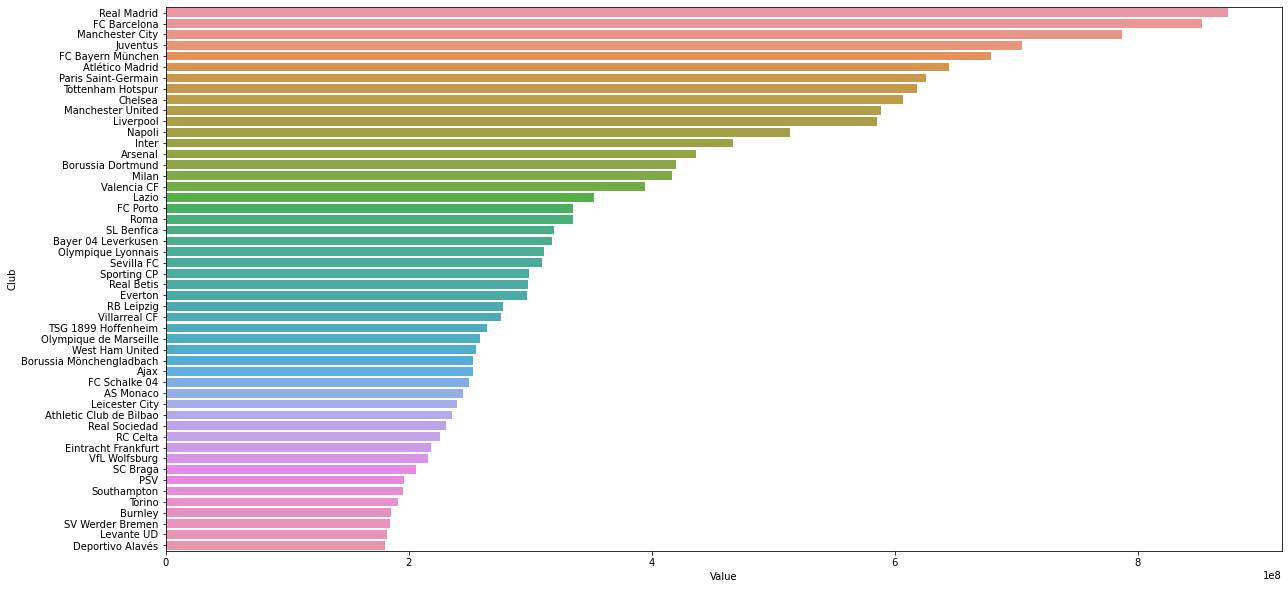

In [31]:
import seaborn as sns
# 클럽 구단 가치 
group = df.groupby('Club')['Value'].sum().reset_index().sort_values('Value', ascending = False).head(50)
plt.figure(figsize = (20,10))
sns.barplot(x = 'Value', y = 'Club', data = group)

In [32]:
group.head(10)

,Club,Value
470,Real Madrid,874425000.0
212,FC Barcelona,852600000.0
374,Manchester City,786555000.0
326,Juventus,704475000.0
214,FC Bayern München,679025000.0
61,Atlético Madrid,644525000.0
435,Paris Saint-Germain,625325000.0
583,Tottenham Hotspur,618450000.0
134,Chelsea,606815000.0
375,Manchester United,588850000.0


In [33]:
group = df.groupby(['Club'])[['Value']]
cmed= group.sum().sort_values(by=['Value'], ascending = False)

In [34]:
cmed.describe()

,Value
count,6.510000e+02
mean,6.739559e+07
std,1.092558e+08
min,1.930000e+06
25%,1.527750e+07
50%,3.052000e+07
75%,6.574250e+07
max,8.744250e+08


In [35]:
club1=list(cmed.query('Value>=65745200').index)
club1
club2=list(cmed.query('Value>=30520000 & Value<65745200').index)
club2
club3=list(cmed.query('Value>=15277500 & Value <30520000').index)
club4=list(cmed.query('Value<15277500').index)
df.insert(7,'Club_V',
            df.apply(lambda x: 
            3 if x['Club'] in club1
            else 2 if x['Club'] in club2
            else 1 if x['Club'] in  club3
            else 0, axis =1))

In [36]:
def Special_C(x):
    if x<2000: return 0
    elif 2000 <= x: return 1
df['Special_C']= df.Special.apply(Special_C)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17918 entries, 0 to 18206
Data columns (total 59 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      17918 non-null  object 
 1   Age                       17918 non-null  int64  
 2   Nation_C                  17918 non-null  int64  
 3   Club_V                    17918 non-null  int64  
 4   Club_N                    17918 non-null  int64  
 5   Overall                   17918 non-null  int64  
 6   Potential                 17918 non-null  int64  
 7   Position_Class            17918 non-null  int64  
 8   Value                     17918 non-null  float64
 9   Wage                      17918 non-null  float64
 10  Special                   17918 non-null  int64  
 11  Preferred Foot            17918 non-null  int64  
 12  International Reputation  17918 non-null  float64
 13  Weak Foot                 17918 non-null  float64
 14  Skill 

In [47]:
df['WR']=df['Attack_WR']+df['Defence_WR']

In [ ]:
df55.to_csv('fifa_include_skills.csv')

히트맵 그려보기

In [42]:
df.columns

Index(['Name', 'Age', 'Nation_C', 'Club_V', 'Club_N', 'Overall', 'Potential',
       'Position_Class', 'Value', 'Wage', 'Special', 'Preferred Foot',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Joined',
       'Loaned From', 'Contract Valid Until', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause',
       'Attack_WR', 'Defence_WR', 'Age_C', 'Over_C', 'Composure_C',
       'Special_C'],
      dtype='object')

In [157]:
df1.to_csv('fifa_ols.csv')

In [150]:
df1=df[['Wage','Value','Overall','Over_C','Potential','Special','Special_C','Age','Age_C','Club_V', 'Club_N','Nation_C','International Reputation','Position_Class'
       ,'Preferred Foot','Composure_C','Attack_WR', 'Defence_WR']]

In [156]:
df1.head()

,Wage,Value,Overall,Over_C,Potential,Special,Special_C,Age,Age_C,Club_V,Club_N,International Reputation,Position_Class,Composure_C
0,565000.0,110500000.0,94,18,94,2202,1,31,6,3,16,5.0,3,3.0
1,405000.0,77000000.0,94,18,94,2228,1,33,7,3,15,5.0,3,3.0
2,290000.0,118500000.0,92,17,93,2143,1,26,4,3,14,5.0,3,3.0
3,260000.0,72000000.0,91,16,93,1471,0,27,5,3,13,4.0,0,3.0
4,355000.0,102000000.0,91,16,92,2281,1,27,5,3,13,4.0,2,3.0


In [155]:
df1.drop(['Nation_C','Preferred Foot','Attack_WR', 'Defence_WR'], axis=1, inplace=True)

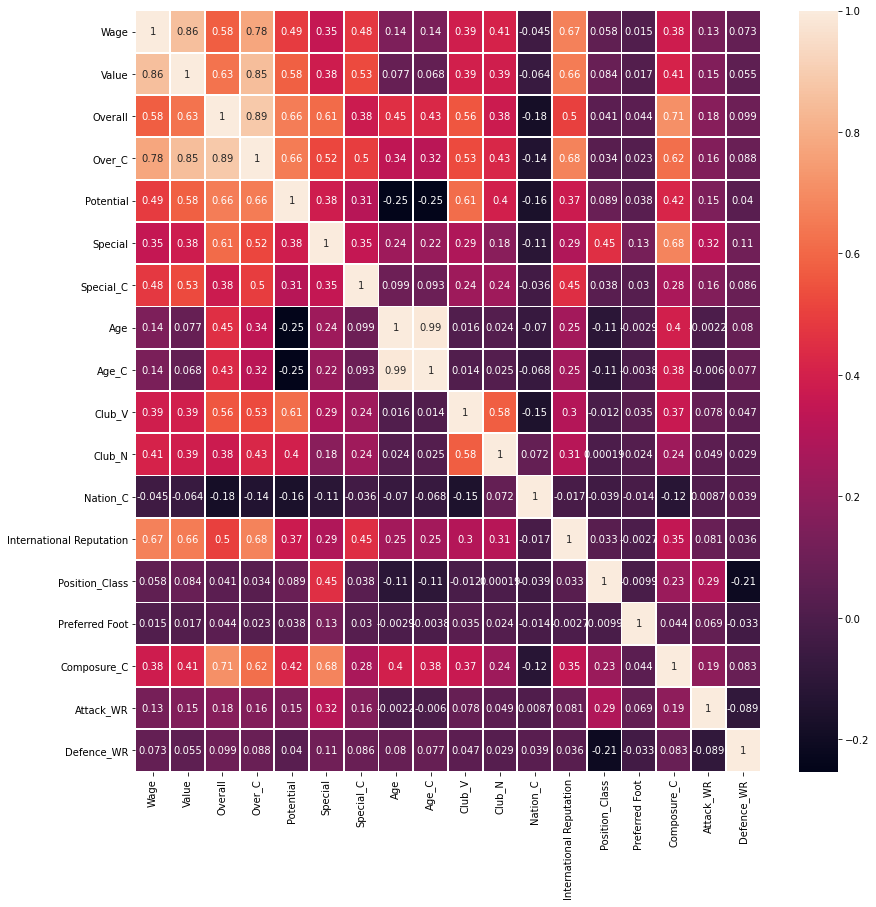

In [151]:
plt.figure(figsize=(14,14))
sns.heatmap(df1.corr(),linewidths=.8, annot=True) 

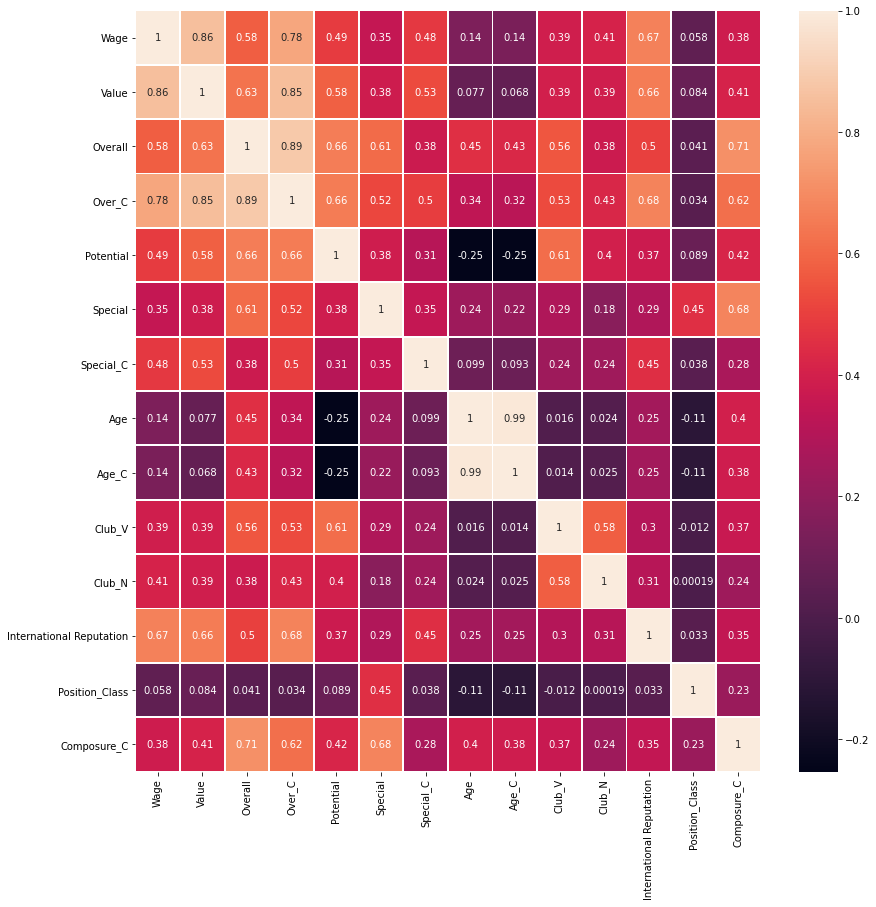

In [158]:
#drop후 다시
plt.figure(figsize=(14,14))
sns.heatmap(df1.corr(),linewidths=.8, annot=True) 

In [ ]:
csv 파일로 만들기

In [59]:
df.columns

Index(['Name', 'Age', 'Nation_C', 'Club_V', 'Club_N', 'Overall', 'Potential',
       'Position_Class', 'Value', 'Wage', 'Special',
       'International Reputation', 'Skill Moves', 'Joined', 'Loaned From',
       'Contract Valid Until', 'Age_C', 'Over_C', 'Special_C', 'WR'],
      dtype='object')

In [65]:
# 많은 스킬포함
# df.to_csv('fifa_include_skills.csv')
df=pd.read_csv('fifa_include_skills.csv', index_col=0)
df.head()

,Name,Age,Nation_C,Club_V,Club_N,Overall,Potential,Position_Class,Value,Wage,Special,International Reputation,Skill Moves,Joined,Loaned From,Contract Valid Until,Age_C,Over_C,Special_C,WR
0,L. Messi,31,0,3,16,94,94,3,110500000.0,565000.0,2202,5.0,4.0,"Jul 1, 2004",NaN,2021,6,18,1,2.0
1,Cristiano Ronaldo,33,2,3,15,94,94,3,77000000.0,405000.0,2228,5.0,5.0,"Jul 10, 2018",NaN,2022,7,18,1,2.0
2,Neymar Jr,26,0,3,14,92,93,3,118500000.0,290000.0,2143,5.0,5.0,"Aug 3, 2017",NaN,2022,4,17,1,3.0
3,De Gea,27,2,3,13,91,93,0,72000000.0,260000.0,1471,4.0,1.0,"Jul 1, 2011",NaN,2020,5,16,0,2.0
4,K. De Bruyne,27,2,3,13,91,92,2,102000000.0,355000.0,2281,4.0,4.0,"Aug 30, 2015",NaN,2023,5,16,1,4.0


In [66]:
df.columns

Index(['Name', 'Age', 'Nation_C', 'Club_V', 'Club_N', 'Overall', 'Potential',
       'Position_Class', 'Value', 'Wage', 'Special',
       'International Reputation', 'Skill Moves', 'Joined', 'Loaned From',
       'Contract Valid Until', 'Age_C', 'Over_C', 'Special_C', 'WR'],
      dtype='object')

In [60]:
# 적당히 줄여서(skill Moves류 몇개 포함)
df.to_csv('fifa_ols.csv')

In [69]:
df1=pd.read_csv('fifa_ols.csv', index_col=0)
df1.head()

,Name,Age,Nation_C,Club_V,Club_N,Overall,Potential,Position_Class,Value,Wage,Special,International Reputation,Skill Moves,Joined,Loaned From,Contract Valid Until,Age_C,Over_C,Special_C,WR
0,L. Messi,31,0,3,16,94,94,3,110500000.0,565000.0,2202,5.0,4.0,"Jul 1, 2004",NaN,2021,6,18,1,2.0
1,Cristiano Ronaldo,33,2,3,15,94,94,3,77000000.0,405000.0,2228,5.0,5.0,"Jul 10, 2018",NaN,2022,7,18,1,2.0
2,Neymar Jr,26,0,3,14,92,93,3,118500000.0,290000.0,2143,5.0,5.0,"Aug 3, 2017",NaN,2022,4,17,1,3.0
3,De Gea,27,2,3,13,91,93,0,72000000.0,260000.0,1471,4.0,1.0,"Jul 1, 2011",NaN,2020,5,16,0,2.0
4,K. De Bruyne,27,2,3,13,91,92,2,102000000.0,355000.0,2281,4.0,4.0,"Aug 30, 2015",NaN,2023,5,16,1,4.0


In [119]:
genius=df[df.Wage>21000]
genius.head()

,Name,Age,Nation_C,Overall,Potential,Club_V,Club_N,Position_Class,Value,Wage,...,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Attack_WR,Defence_WR,Over_C,Composure_C,Age_C
0,L. Messi,31,0,94,94,3,SPAIN,3,110500000.0,565000.0,...,11.0,15.0,14.0,8.0,226500000.0,1,1,18,3.0,6
1,Cristiano Ronaldo,33,2,94,94,3,ITALY,3,77000000.0,405000.0,...,11.0,15.0,14.0,11.0,127100000.0,2,0,18,3.0,7
2,Neymar Jr,26,0,92,93,3,FRANCE,3,118500000.0,290000.0,...,9.0,15.0,15.0,11.0,228100000.0,2,1,17,3.0,4
3,De Gea,27,2,91,93,3,ENGLAND,0,72000000.0,260000.0,...,85.0,87.0,88.0,94.0,138600000.0,1,1,16,2.0,5
4,K. De Bruyne,27,2,91,92,3,ENGLAND,2,102000000.0,355000.0,...,13.0,5.0,10.0,13.0,196400000.0,2,2,16,3.0,5


In [121]:
genius.to_csv('genius_a.csv')

In [2]:
df=pd.read_csv('genius_a.csv',index_col=0)
df.head()

,Name,Age,Nation_C,Overall,Potential,Club_V,Club_N,Position_Class,Value,Wage,...,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Attack_WR,Defence_WR,Over_C,Composure_C,Age_C
0,L. Messi,31,0,94,94,3,SPAIN,3,110500000.0,565000.0,...,11.0,15.0,14.0,8.0,226500000.0,1,1,18,3.0,6
1,Cristiano Ronaldo,33,2,94,94,3,ITALY,3,77000000.0,405000.0,...,11.0,15.0,14.0,11.0,127100000.0,2,0,18,3.0,7
2,Neymar Jr,26,0,92,93,3,FRANCE,3,118500000.0,290000.0,...,9.0,15.0,15.0,11.0,228100000.0,2,1,17,3.0,4
3,De Gea,27,2,91,93,3,ENGLAND,0,72000000.0,260000.0,...,85.0,87.0,88.0,94.0,138600000.0,1,1,16,2.0,5
4,K. De Bruyne,27,2,91,92,3,ENGLAND,2,102000000.0,355000.0,...,13.0,5.0,10.0,13.0,196400000.0,2,2,16,3.0,5


In [12]:
df.Wage.describe()

count      2031.000000
mean      51529.788282
std       46878.660831
min       22000.000000
25%       27000.000000
50%       36000.000000
75%       54000.000000
max      565000.000000
Name: Wage, dtype: float64

In [26]:
df.Wage.value_counts()

22000.0     128
24000.0     102
26000.0      95
25000.0      92
23000.0      90
           ... 
200000.0      1
225000.0      1
290000.0      1
93000.0       1
230000.0      1
Name: Wage, Length: 122, dtype: int64

<AxesSubplot:title={'center':'Genius group Wage Histogram'}, xlabel='Wage', ylabel='Density'>

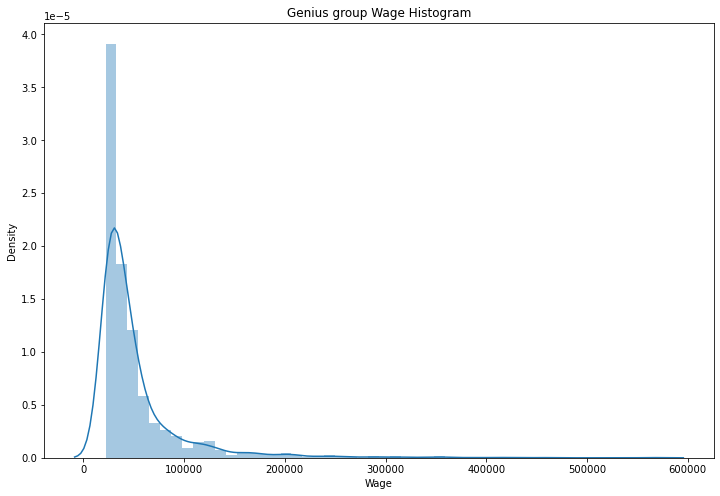

In [28]:
plt.figure(figsize=(12,8))
plt.title('Genius group Wage Histogram')
sns.distplot(df.Wage)

<AxesSubplot:title={'center':'Log Transformed Genius group Wage Histogram'}, xlabel='Wage', ylabel='Density'>

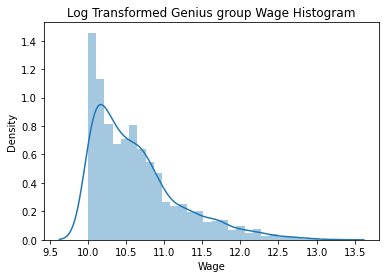

In [16]:
plt.title('Log Transformed Genius group Wage Histogram')
log_Wage=np.log1p(df['Wage'])
sns.distplot(log_Wage)

<AxesSubplot:title={'center':'Ordinary group Wage Histogram'}, xlabel='Wage', ylabel='Density'>

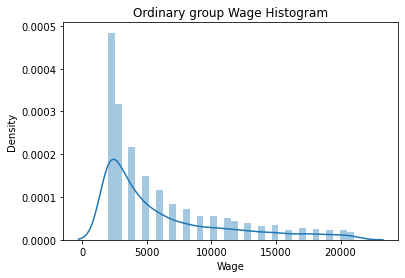

In [29]:
plt.title('Ordinary group Wage Histogram')
sns.distplot(ordinary.Wage)

<AxesSubplot:title={'center':'Log Transformed Ordinary group Wage Histogram'}, xlabel='Wage', ylabel='Density'>

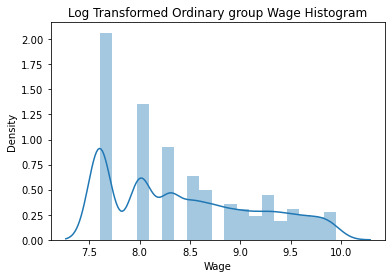

In [30]:
plt.title('Log Transformed Ordinary group Wage Histogram')
log_Wage=np.log1p(ordinary['Wage'])
sns.distplot(log_Wage)